# Estimates of relatedness for a tara iti family group
The tara iti population is thoroughly monitored to track parentage for breeding pairs. In the 2019/2020 breeding season a male believed to be infertile (TI007; C69024; unknown colour bands) was the social parent of two chicks (TI036; C69057; RY-BM & TI038; C69059; KM-WB). Questions remained around whether this male successfully reproduced, or the chicks were sired by another male. Feather samples for the dam (TI028; C75805; unknown colour bands) and putative sire were collected as part of ongoing DOC management practices, however initial attempts to extract DNA sufficient for whole-genome sequencing were not successful for TI028. Another attempt to extract DNA for the dam of these chicks was made after her remains were recovered, which yielded promising results.  

For those samples that passed quality control (QC) thresholds for their DNA extractions, we implemented three distinct rounds of filtering of their sequence data: 1) We assessed the quality scores of the reads assigned by the sequencing instrument and the ratio of individual base-pairs of their genetic sequences (i.e., the ratios of A's, T's, G's, & C's); 2) Identified potential artifacts introduced in the process of preparing the DNA for sequencing, and implemented minimum depth and coverage thresholds; and 3) Reassessed confidence assigning the location of given sequence reads in the genome, and their alignment depths. Part one provides insight into how confident the sequencing instrument is in assigning an identity to individual base-pairs. By assessing the ratios A's, T's, G's and C's we can also assess the likelihood of contamination. For part two, we align reads to the reference genome in order to remove reads that were not likely amplified directly from template DNA strands (i.e., artifacts). These artifacts are an expected outcome of this approach for whole-genome sequencing and their prevalence can be affected by DNA quality. For part two, we also restricted the alignments to regions of the genome that we have assembled with confidence. We then examine the average number of copies aligning to particular regions of the genome, with more copies providing more confidence around an individual's genotype. We also assessed the proportion of the genome covered (represented as a percentage), aiming for as much of the genome as possible to be covered. At this step, we required individuals to have a median depth >= 6x and a mapping coverage >= 97% to be retained for population analyses. Finally, we examined mean depth after filtering out reads that did not map well to the tara iti genome (MapQ <20), as a final screen for high rates of squence error and/or contamination.  

After passing sequence data for our individuals of interest through these filters, it was clear that TI007 and TI028 did not meet the minimum quality thresholds required for inclusion in downstream population analyses. Specifically, TI028 did not pass the inital sequencing quality thresholds as the ratios of her base-pairs did not match expectation and the overall quantity of data was low. This is not surprising given the state of her sample, and the different method used to prepare her sample for sequencing that aimed to address sample degradation. While sequence data for TI007 and TI009 passed the first QC check, they both failed to meet the minimum depth thresholds implemented in step two. Notably, while TI036 passed thresholds in QC steps 1 and 2 it passed by marginally meeting the thresholds implemented in step 3.  

The results of these filtering steps presents unique challenges for inferring the relationships among individuals. There is a balance between being conservative enough that we have confidence in the results and retaining informative data. To maximise the utility of data for understanding the relatedness estimates for our individuals of interest, we implemented an approach that can boost confidence in results by accounting for uncertainty in our sample sequence data. We leveraged a programme called [ANGSD](https://github.com/ANGSD/angsd), which implements a genotype likelihood approach and has been shown to provide robust results for low coverage sequence data. We also considered relationships among individuals included in the analysis, which can boost confidence in genotyping calls and use known relationships for groundtruthing results. In our case, the data for the putative sire and the dam are of relatively poor quality. To ensure that our data is sufficient to accurately infer relationships, we included a full sibling to TI007 (TI009; C69027; unknown colour bands) for confirmation. This male is also of interest as he may also have fertility challenges. However, the data quality for this male is similar to that of TI007. To put these relationships into context, we randomly chose an additional six samples ranging in quality similar to TI007, TI009, and TI028 (n = 1), similar to TI036 (n = 1), and high-quality samples (n = 4). 

[ANGSD](https://github.com/ANGSD/angsd) can implement additional filtering parameters to ensure sites included in relatedness estimates are comparable across individuals. For this, we required that a site had to be present in all 11 individuals and that on average a site had a mean coverage of >=6x per individual and that reads included had a MapQ and read Q-score >=20 (99% accuracy). In effect, this approach would reduce the proportion of the genome included in our analyses in exchange for certainty around the genotype likelihoods for sites passing these thresholds. Of the 1,183,544,682 sites assessed, only 308,747 were retained to estimate relatedness. 

Finally, we chose two metrics of relatednes R<sub>AB</sub> ([Hendrick & Lacy 2015](https://doi.org/10.1093/jhered/esu072)) and KING ([Waples et al 2019](https://doi.org/10.1111/mec.14954)). Both have been shown to perform well with low-coverage data sets for inbred populations ([Hauser et al 2022](https://doi.org/10.1111/1755-0998.13630)). We first called genotype likelihoods for these samples with the software tool [ANGSD](https://github.com/ANGSD/angsd), and estimated relatedness using [ngsRelate](https://github.com/ANGSD/NgsRelate). Figures were plotted using Python v. 3.9.21.  

In [25]:
import os
import pandas as pd
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
from IPython.display import display, HTML
import matplotlib.pyplot as plt

path = '/nesi/nobackup/uc03718/angsd/'
os.chdir(path)
print(os.getcwd())

/nesi/nobackup/uc03718/angsd


In the table below, we provide valueses corresponding to inferred relationships for R<sub>AB</sub> and KING. First Order relationships are the relationship between parents, offspring, and full siblings. Second order relationships are between aunts, uncles, grandparents, grandchildren, nieces, nephews, or half-siblings. Finally, examples of third order relationships include first cousins, great-grandparents, great-aunts and -uncles, great-nieces and -nephews, great-grandchildren, half-aunts, or half-uncles. 

|    Relationship   | R<sub>AB</sub> |      KING     |
|:-----------------:|:--------------:|:-------------:|
| Duplicate/MZ Twin |       1        |     >0.354    |
| First Order       |  0.250 - 0.500 | 0.177 - 0.354 |
| Second Order      |  0.125 - 0.250 | 0.088 - 0.177 |
| Third Order       |  0.060 - 0.125 | 0.044 - 0.088 |

**A significant caveat to the results below are that the values of each estimator may not be representative of exact levels of relatedness or individual inbreeding.** This is because of the challenges associated with data quality. All values below are used to categorise individuals into either First, Second or Third order relationships and should not be used to infer how similar two individuals are to one another. In the code block below, we load our estimates of relatedness, extract the estimators of interest (R<sub>AB</sub> and KING), and sort each in descending order. We then examine the individuals with the 10 highest estimates of relatedness for each estimator.  

In [31]:
TI_wg = pd.read_csv('samtools/relatedness/familyTest_TI_relatedness', sep='\t')

TI_wg_Rab = TI_wg.pivot(index='a', columns='b', values='rab')
TI_wg_KING = TI_wg.pivot(index='a', columns='b', values='KING')

TI_wg_Rab_column = TI_wg[['a', 'b', 'rab']].sort_values(by = ['rab'], ascending=[False]).head(n=10)
TI_wg_KING_column = TI_wg[['a', 'b', 'KING']].sort_values(by = ['KING'], ascending = [False]).head(n=10)

display(HTML(
    f"""
    <div style="display: flex; gap: 40px;">
        <div>{TI_wg_Rab_column.style.set_table_attributes("style='display:inline'")._repr_html_()}</div>
        <div>{TI_wg_KING_column.style.set_table_attributes("style='display:inline'")._repr_html_()}</div>
    </div>
    """
))

,a,b,rab
27,TI36,TI38,0.347842
0,TI07,TI09,0.331836
20,TI28,TI38,0.328548
19,TI28,TI36,0.298152
51,TI68,TI99,0.171895
4,TI07,TI40,0.130229
13,TI09,TI40,0.084447
38,TI38,TI82,0.074652
40,TI40,TI44,0.073535
32,TI36,TI82,0.055097


Here, we can see that the individuals consistently resulting in first order relationships are our two siblings of interest (TI036 & TI038), as well as their dam (TI028). This indicates that TI036 & TI038 are full siblings. We also see the two putatively infertile males (TI007 & TI009) also having first order relationship (full sibling) to one another as expected. However, estimates between TI007 and either TI036 or TI038 do not result in first order relationships and indicate that he is not the sire of these chicks.  

Below we plot a heatmap of relatedness to visualise all samples together. We can clearly see our two family groups coming up in green (indicating first order relationships), while the remaining samples having relatively lower estimates of relatedness.  

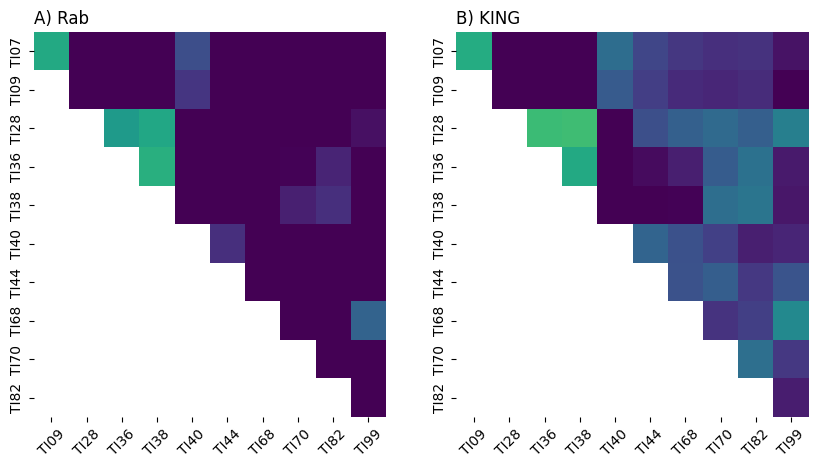

In [ ]:
cmap = sns.color_palette('viridis', as_cmap=True)  # Use 'as_cmap=True' to return a colormap

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)

sns.heatmap(TI_wg_Rab, annot=False, cmap=cmap, vmin=0, vmax=0.55, cbar=True, ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('A) Rab', loc='left')
ax[0].tick_params(axis='x', rotation=45)
sns.heatmap(TI_wg_KING, annot=False, cmap=cmap, vmin=0, vmax=0.35, cbar=True, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('B) KING', loc='left')
ax[1].tick_params(axis='x', rotation=45)

Given the congruence of the data confirming the relationships between TI007 & TI009, as well as TI028 and her offspring, there is no evidence that TI007 is the genetic sire of either TI036 or TI038.  